In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')
df_test = pd.read_excel('Test_set.xlsx')

In [3]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df_train.shape

(10683, 11)

In [6]:
df_test.shape

(2671, 10)

# Data Checks
1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

In [7]:
### Checking the null values

In [8]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [10]:
## Checking the duplicates in dataset
df_train.duplicated().sum()

220

In [11]:
df_test.duplicated().sum()

26

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [14]:
#Checking the number of unique values
df_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [15]:
df_test.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

In [16]:
#Checking the stats of the dataset
df_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [17]:
#checking the various categories in the dataset
[col for col in df_train.columns if df_train[col].dtypes=='O']

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [18]:
#Check various categories present in the different categorical column
[df_train[col].unique() for col in df_train.columns if df_train[col].dtypes=='O']

[array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
        'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
        'Vistara Premium economy', 'Jet Airways Business',
        'Multiple carriers Premium economy', 'Trujet'], dtype=object),
 array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
        '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
        '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
        '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
        '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
        '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
        '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
        '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
        '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
        '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object),
 array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mum

# EDA

In [19]:
## Dropping null values
df_train.dropna(inplace=True)

In [20]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [21]:
df_train['Journey_day'] = pd.to_datetime(df_train['Date_of_Journey'],format ='%d/%m/%Y').dt.day

In [22]:
df_train['Journey_month'] = pd.to_datetime(df_train['Date_of_Journey'],format ='%d/%m/%Y').dt.month

In [23]:
df_test['Journey_day'] = pd.to_datetime(df_test['Date_of_Journey'],format ='%d/%m/%Y').dt.day
df_test['Journey_month'] = pd.to_datetime(df_test['Date_of_Journey'],format ='%d/%m/%Y').dt.month

In [24]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [25]:
df_train['Dep_hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour
df_train['Dep_min'] = pd.to_datetime(df_train['Dep_Time']).dt.minute

C:\Users\bhanu\AppData\Local\Temp\ipykernel_11736\297758934.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['Dep_hour'] = pd.to_datetime(df_train['Dep_Time']).dt.hour
C:\Users\bhanu\AppData\Local\Temp\ipykernel_11736\297758934.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['Dep_min'] = pd.to_datetime(df_train['Dep_Time']).dt.minute


In [26]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [27]:
df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute

C:\Users\bhanu\AppData\Local\Temp\ipykernel_11736\110163973.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Dep_hour'] = pd.to_datetime(df_test['Dep_Time']).dt.hour
C:\Users\bhanu\AppData\Local\Temp\ipykernel_11736\110163973.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Dep_min'] = pd.to_datetime(df_test['Dep_Time']).dt.minute


In [28]:
df_train['Arrival_hour'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
df_train['Arrival_minu'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute

C:\Users\bhanu\AppData\Local\Temp\ipykernel_11736\2262002050.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['Arrival_hour'] = pd.to_datetime(df_train['Arrival_Time']).dt.hour
C:\Users\bhanu\AppData\Local\Temp\ipykernel_11736\2262002050.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['Arrival_minu'] = pd.to_datetime(df_train['Arrival_Time']).dt.minute


In [29]:
df_test['Arrival_hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute

C:\Users\bhanu\AppData\Local\Temp\ipykernel_11736\3288131145.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Arrival_hour'] = pd.to_datetime(df_test['Arrival_Time']).dt.hour
C:\Users\bhanu\AppData\Local\Temp\ipykernel_11736\3288131145.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['Arrival_min'] = pd.to_datetime(df_test['Arrival_Time']).dt.minute


In [30]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minu
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [31]:
duration = list(df_train['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
duration_hrs=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [32]:
df_train['Duration_hrs'] = duration_hrs
df_train['Duration_mins'] = duration_mins

In [33]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minu,Duration_hrs,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [34]:
duration = list(df_test['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
duration_hrs=[]
duration_mins=[]

for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [35]:
df_test['Duration_hrs'] = duration_hrs
df_test['Duration_mins'] = duration_mins

In [36]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hrs,Duration_mins
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55,2,45,2,50


In [37]:
df_train.drop(columns = ['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)
df_test.drop(columns = ['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

In [38]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minu,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [39]:
df_train['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

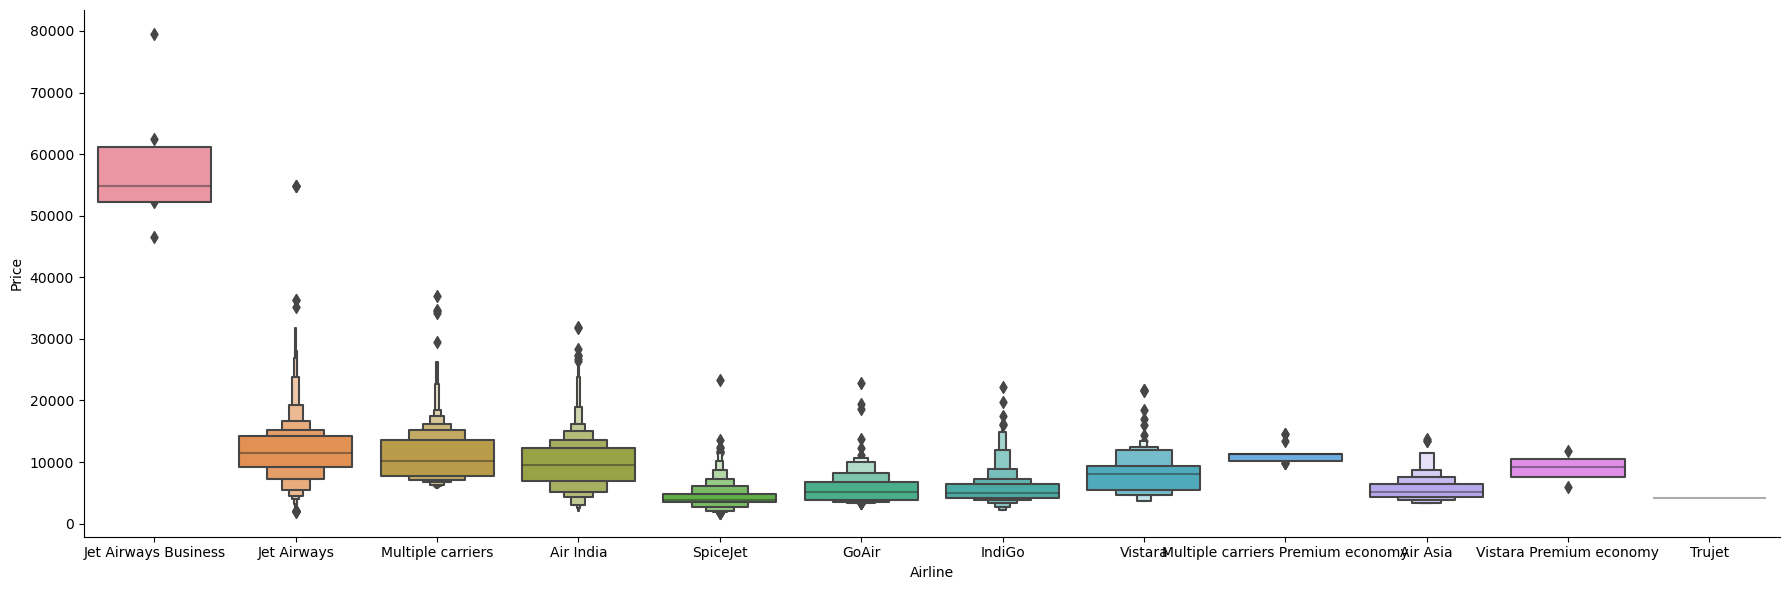

In [40]:
sns.catplot(x='Airline',y='Price',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [41]:
airline = df_train['Airline']
airline = pd.get_dummies(airline,dtype=int,drop_first=True)

In [42]:
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

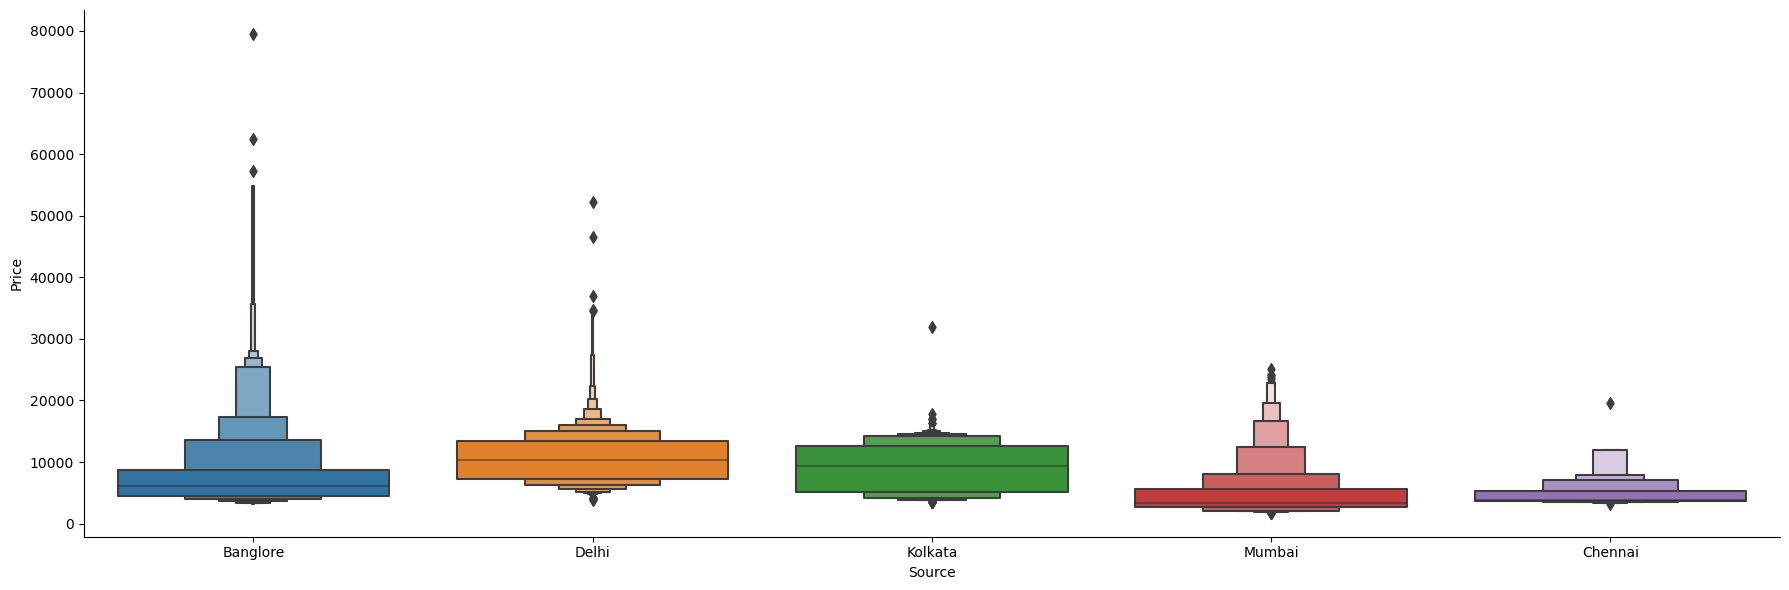

In [43]:
sns.catplot(x='Source',y='Price',data=df_train.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [44]:
source = pd.get_dummies(df_train['Source'],dtype=int,drop_first=True).rename(columns=lambda x:'src_' +str(x))

In [45]:
source.head()

,src_Chennai,src_Delhi,src_Kolkata,src_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [46]:
destination = pd.get_dummies(df_train['Destination'],dtype=int,drop_first=True).rename(columns=lambda x:'dst_' +str(x))

In [47]:
destination.head()

,dst_Cochin,dst_Delhi,dst_Hyderabad,dst_Kolkata,dst_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [48]:
df_train.drop(columns =['Route','Additional_Info'],axis=1,inplace=True)

In [49]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minu,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [50]:
df_train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [51]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minu,Duration_hrs,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [52]:
df_train  = pd.concat([df_train,airline,source,destination],axis=1)
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Vistara Premium economy,src_Chennai,src_Delhi,src_Kolkata,src_Mumbai,dst_Cochin,dst_Delhi,dst_Hyderabad,dst_Kolkata,dst_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [53]:
df_train.drop(columns = ['Airline','Source','Destination'],axis=1,inplace=True)
df_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minu,Duration_hrs,Duration_mins,...,Vistara Premium economy,src_Chennai,src_Delhi,src_Kolkata,src_Mumbai,dst_Cochin,dst_Delhi,dst_Hyderabad,dst_Kolkata,dst_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey_day                        10682 non-null  int32
 3   Journey_month                      10682 non-null  int32
 4   Dep_hour                           10682 non-null  int32
 5   Dep_min                            10682 non-null  int32
 6   Arrival_hour                       10682 non-null  int32
 7   Arrival_minu                       10682 non-null  int32
 8   Duration_hrs                       10682 non-null  int64
 9   Duration_mins                      10682 non-null  int64
 10  Air India                          10682 non-null  int32
 11  GoAir                              10682 non-null  int32
 12  IndiGo                 

In [55]:
df_train.shape

(10682, 30)

In [56]:
airline = df_test['Airline']
airline = pd.get_dummies(airline,dtype=int,drop_first=True)

source = pd.get_dummies(df_test['Source'],dtype=int,drop_first=True).rename(columns=lambda x:'src_' +str(x))

destination = pd.get_dummies(df_test['Destination'],dtype=int,drop_first=True).rename(columns=lambda x:'dst_' +str(x))

df_test.drop(columns =['Route','Additional_Info'],axis=1,inplace=True)

df_test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)


df_test  = pd.concat([df_test,airline,source,destination],axis=1)
df_test.head()

df_test.drop(columns = ['Airline','Source','Destination'],axis=1,inplace=True)
df_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hrs,Duration_mins,Air India,...,Vistara Premium economy,src_Chennai,src_Delhi,src_Kolkata,src_Mumbai,dst_Cochin,dst_Delhi,dst_Hyderabad,dst_Kolkata,dst_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [57]:
df_test.shape

(2671, 28)

In [58]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minu', 'Duration_hrs',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'src_Chennai', 'src_Delhi', 'src_Kolkata',
       'src_Mumbai', 'dst_Cochin', 'dst_Delhi', 'dst_Hyderabad', 'dst_Kolkata',
       'dst_New Delhi'],
      dtype='object')

In [59]:
X= df_train.loc[:,['Total_Stops','Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minu', 'Duration_hrs',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'src_Chennai', 'src_Delhi', 'src_Kolkata',
       'src_Mumbai', 'dst_Cochin', 'dst_Delhi', 'dst_Hyderabad', 'dst_Kolkata',
       'dst_New Delhi']]

In [60]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_minu,Duration_hrs,Duration_mins,Air India,...,Vistara Premium economy,src_Chennai,src_Delhi,src_Kolkata,src_Mumbai,dst_Cochin,dst_Delhi,dst_Hyderabad,dst_Kolkata,dst_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
y = df_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<Axes: >

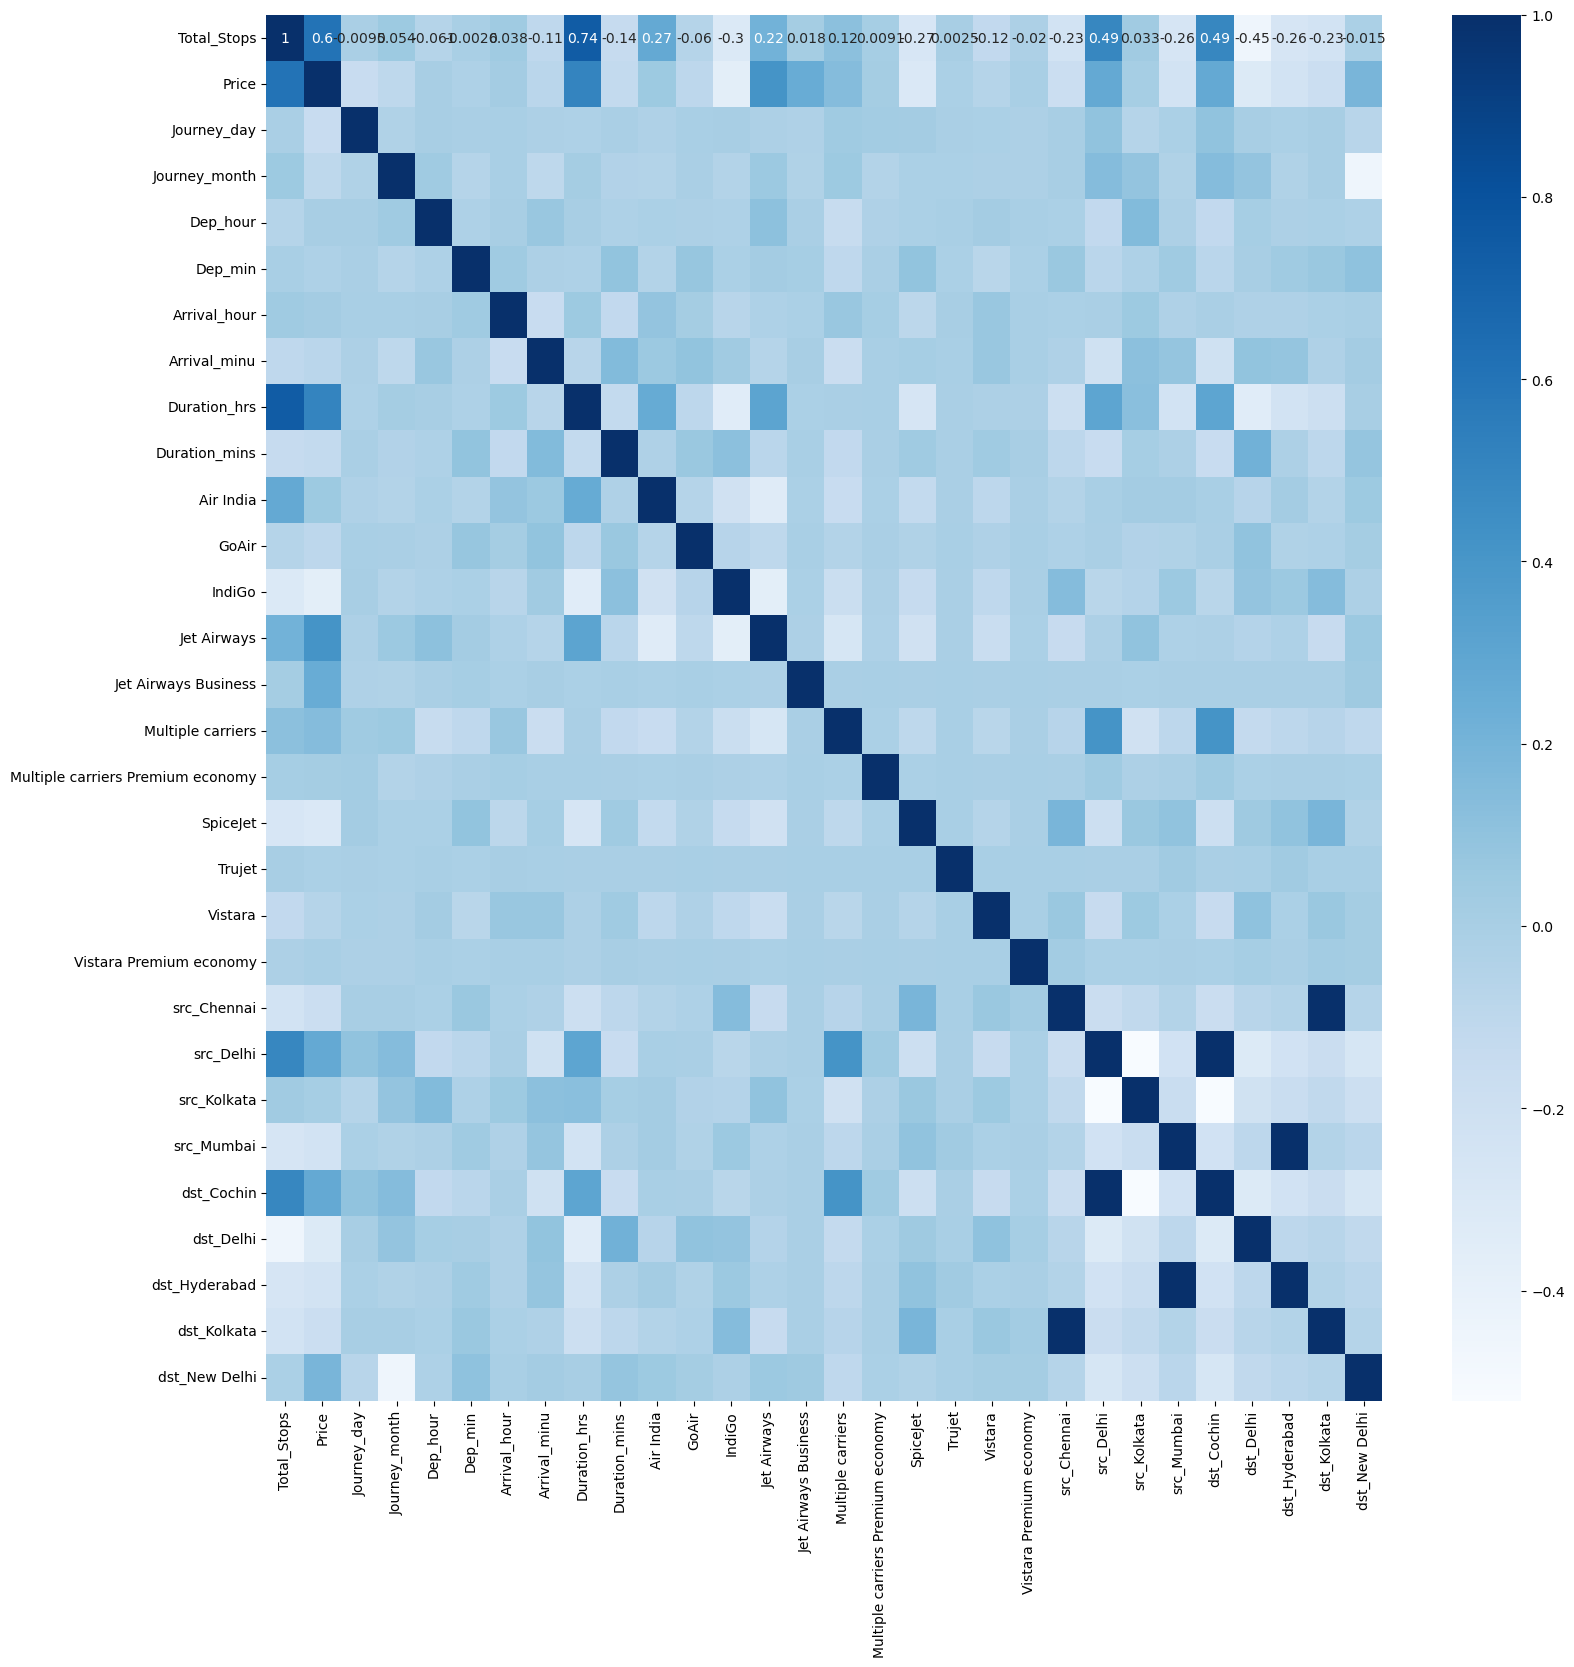

In [62]:
plt.figure(figsize=(18,18))
sns.heatmap(df_train.corr(),annot=True,cmap='Blues')

In [63]:
from sklearn.ensemble import ExtraTreesRegressor
sel = ExtraTreesRegressor()
sel.fit(X,y)

ExtraTreesRegressor()

In [64]:
print(sel.feature_importances_)

[2.34018519e-01 1.43362668e-01 5.38779412e-02 2.46796892e-02
 2.05772836e-02 2.79793150e-02 1.95615369e-02 1.13642822e-01
 1.80412347e-02 9.33479812e-03 1.94865269e-03 1.80009937e-02
 1.43981621e-01 6.71309584e-02 1.78152589e-02 9.04149752e-04
 3.14341398e-03 1.14963017e-04 5.13066714e-03 8.19403616e-05
 4.55699105e-04 1.04190467e-02 3.14548536e-03 7.25675508e-03
 1.02444386e-02 1.39759620e-02 5.73975673e-03 5.03395063e-04
 2.49310348e-02]


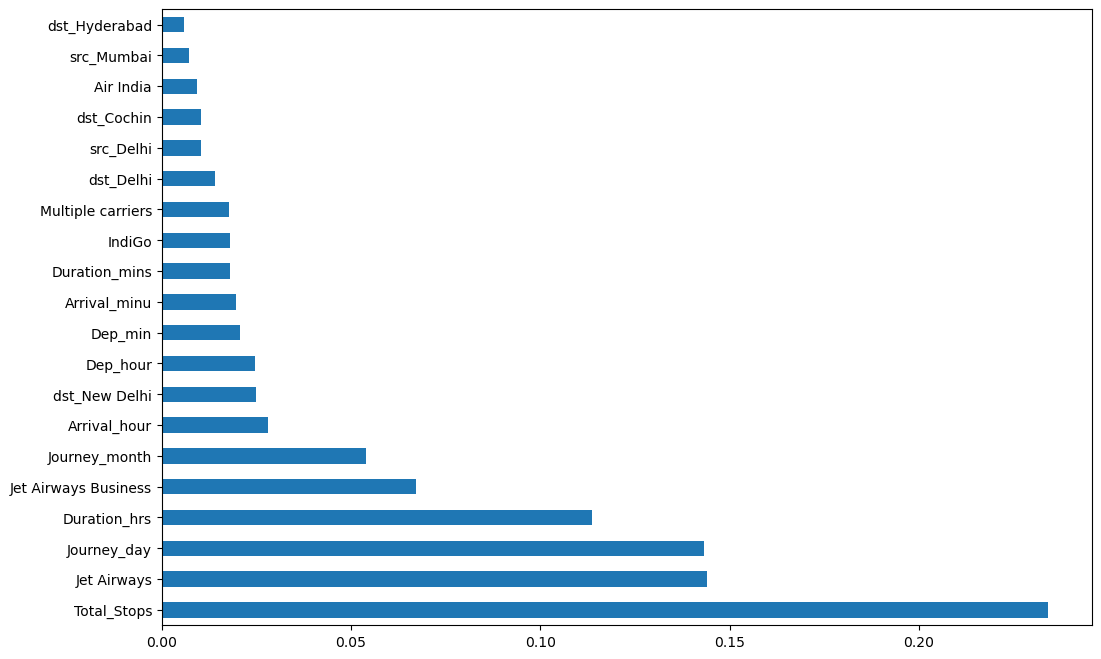

In [65]:
plt.figure(figsize=(12,8))
feature_imp = pd.Series(sel.feature_importances_,index=X.columns)
feature_imp.nlargest(20).plot(kind='barh')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

In [67]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [68]:
y_pred = rfr.predict(X_test)

In [69]:
rfr.score(X_train,y_train)

0.952999324313409

In [70]:
rfr.score(X_test,y_test)

0.7984938465101347

C:\Users\bhanu\AppData\Local\Temp\ipykernel_11736\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


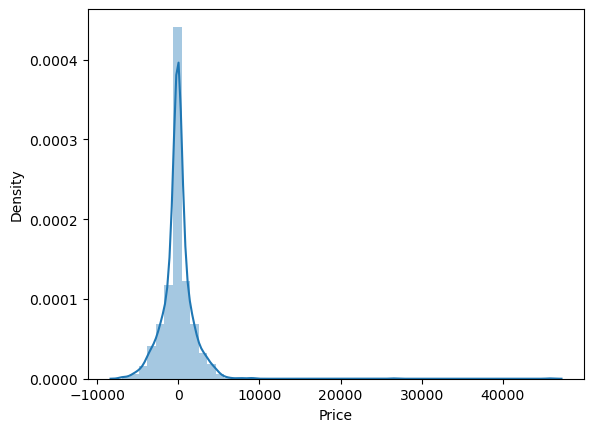

In [71]:
sns.distplot(y_test-y_pred)
plt.show()

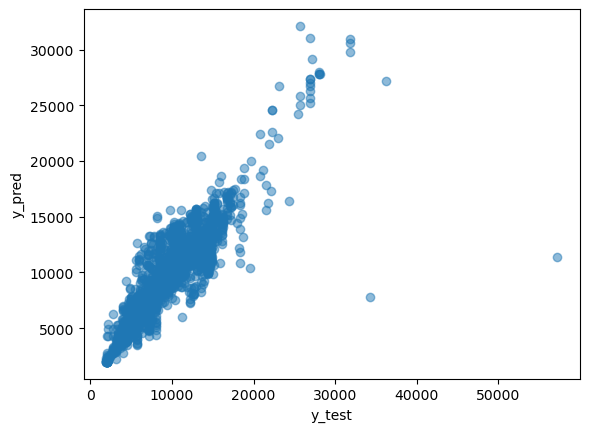

In [72]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [73]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [74]:
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  1179.6210211056687
MSE:  4344887.031213666
RMSE:  2084.4392606199076


In [75]:
r2_score(y_test,y_pred)

0.7984938465101347

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
n_estimators = [int(x) for x in np.linspace(start =100,stop =1200, num=12)]
max_features=['sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,20,50,100]
min_samples_leaf=[1,2,5,7,10]

In [78]:
params = {'n_estimators': n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
         'min_samples_leaf':min_samples_leaf}

In [79]:
rf_random = RandomizedSearchCV(rfr,param_distributions=params,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [80]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=  13.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=  13.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=  16.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=  13.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=900; total time=  18.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=  17.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1100; total time=  15.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              50, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [81]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [82]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 900,min_samples_split= 5, min_samples_leaf= 1,max_features='sqrt',max_depth= 15)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=5,
                      n_estimators=900)

In [83]:
prediction = rfr.predict(X_test)

C:\Users\bhanu\AppData\Local\Temp\ipykernel_11736\3354484248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


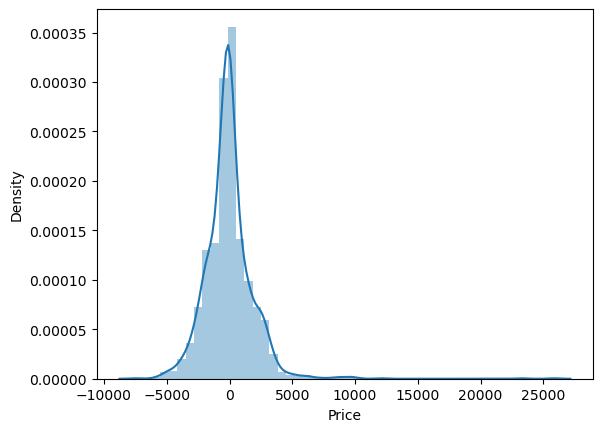

In [84]:
sns.distplot(y_test-prediction)
plt.show()

In [85]:
predic =rf_random.predict(X_test)

C:\Users\bhanu\AppData\Local\Temp\ipykernel_11736\3060499325.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predic)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


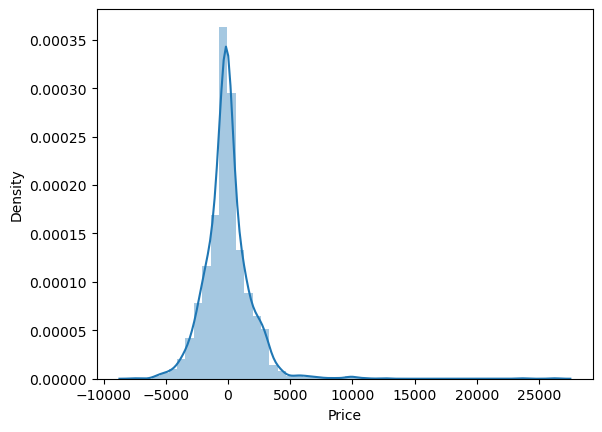

In [86]:
sns.distplot(y_test-predic)
plt.show()

In [87]:
import pickle
file = open('flight.pkl','wb')
pickle.dump(rfr,file)

In [88]:
r2_score(y_test,prediction)

0.8239908222528747